In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Importing the libraries

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

df.shape

df.describe()

df.isnull()

df.isnull().sum()

df.info()

df.dtypes

df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.duplicated().sum()

0

In [5]:
df['Exited'].value_counts()    # 0 indicate people stay with bank and 1 left the bank shown in balance

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)  #dropping unnecssary column inplace means permanantly removed

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Now convert categorical column into one hot encoder Geography and gender

df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)   #drop first it helps in reducing the extra column created during dummy variable creation. see gender

In [11]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [12]:
# Now see column X and Y
X = df.drop(columns=['Exited'])
y = df['Exited']



In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [16]:
X_train.shape

(7000, 11)

In [17]:
# Now scale the values

# Normalizing the values with mean as 0 and Standard Deviation as 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [18]:
X_train_scaled   # shown 2 D array with small values

array([[-0.06042858, -0.18527928,  1.02868011, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [-1.74363086,  0.00532326,  0.33476465, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 0.31132161, -0.18527928,  1.72259557, ..., -0.58350885,
        -0.57273139, -1.08628092],
       ...,
       [ 0.22871046,  0.57713088,  1.37563784, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 0.13577291,  0.00532326,  1.02868011, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 1.16841234,  0.29122707,  0.33476465, ...,  1.71377008,
        -0.57273139,  0.92057219]])

In [19]:
X_train_scaled.shape

(7000, 11)

In [20]:
X_test_scaled

array([[-1.03110965,  0.76773342, -1.05306628, ..., -0.58350885,
        -0.57273139,  0.92057219],
       [ 0.31132161, -0.47118309, -0.70610855, ..., -0.58350885,
        -0.57273139,  0.92057219],
       [-1.22731114,  0.29122707, -1.05306628, ..., -0.58350885,
        -0.57273139, -1.08628092],
       ...,
       [-0.05010219, -1.32889452, -1.74698174, ..., -0.58350885,
        -0.57273139,  0.92057219],
       [-0.38054681, -1.13829198, -0.01219309, ..., -0.58350885,
        -0.57273139, -1.08628092],
       [ 0.17707849, -0.28058055, -0.70610855, ..., -0.58350885,
         1.74601919, -1.08628092]])

In [21]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [22]:
df_churn_exited = df[df['Exited']==1]['Tenure']     #customer left the bank
df_churn_not_exited = df[df['Exited']==0]['Tenure']  #customer not left the bank

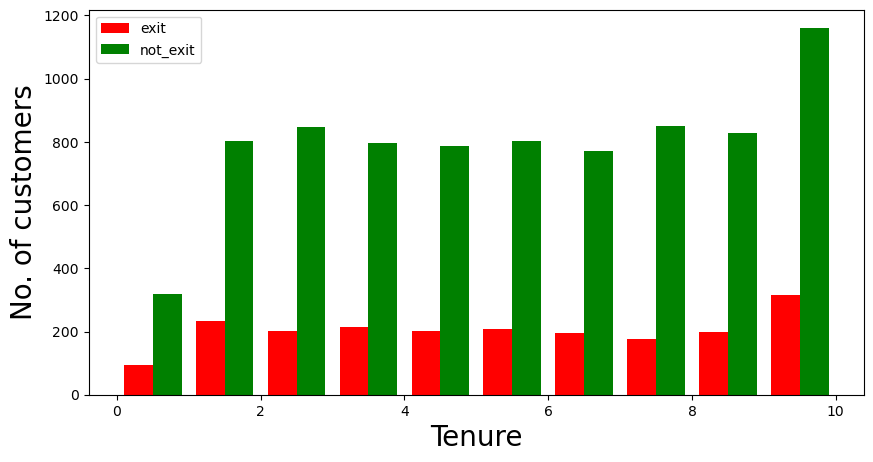

In [23]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [24]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

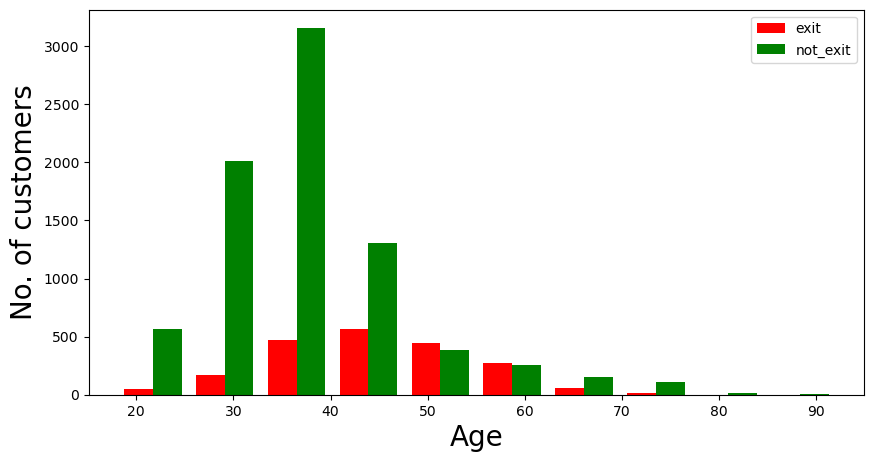

In [25]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

In [26]:
import keras #Keras is an Open Source Neural Network library written in Python that runs on top of Theano or Tensorflow.
# we Can use Tenserflow as well but won't be able to understand the errors initially.

In [27]:
from keras.models import Sequential #To create sequential neural network layers in a sequential order
from keras.layers import Dense #To create hidden layers

In [28]:
classifier = Sequential()  # sequential is class name ie a predictive modeling problem where you have some sequence of inputs over space or time, and the task is to predict a category for the sequence
#Units: it denotes the output size of the layer, normally average of no of node in input layer (no of independent variable) which is 11 and no of node in output layer which is 1, we took 6 as average.
#Kernel_initializer : The initializer parameters tell Keras how to initialize the values of our layer, weight matrix and our bias vector
#Activation: Element-wise activation function to be used in the dense layer. read more about Rectified Linear Unit (ReLU)
#Input_dim: for first layer only, number of input independent variable. only for first hidden layer
#Bias : if we are going with advance implementation

classifier.add(Dense(units =3 , activation='sigmoid', kernel_initializer='uniform', input_dim = 11))   #input layer 11 hidden layer=3 #uniform is type of distribution

classifier.add(Dense(units =1 , activation='sigmoid', kernel_initializer='uniform',))  # output layer is 1


In [29]:
classifier.summary()

# 11*3 + 3 bias=36
# 3*1 + 1 bias = 4
# total= 36+4= 40


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Now compile model using loss function it is binary classification problem


# Optimizer: update the weight parameters to minimize the loss function..
# Loss function: acts as guides to the terrain telling optimizer if it is moving in the right direction to reach the bottom of the valley, the global minimum.
# Metrics: A metric function is similar to a loss except that the results from evaluating a metric are not used when training the model.
# Batch size: hyper-parameter related to sample
# Epochs: hyper-parameter related to iteration

classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output
classifier.fit(X_train_scaled,y_train,batch_size = 10,epochs=10, validation_split=0.2 )


Epoch 1/10


560/560 [==============================] - 3s 2ms/step - loss: 0.5565 - accuracy: 0.7984 - val_loss: 0.4841 - val_accuracy: 0.7993
Epoch 2/10
560/560 [==============================] - 1s 2ms/step - loss: 0.4652 - accuracy: 0.7984 - val_loss: 0.4571 - val_accuracy: 0.7993
Epoch 3/10
560/560 [==============================] - 1s 2ms/step - loss: 0.4479 - accuracy: 0.7984 - val_loss: 0.4476 - val_accuracy: 0.7993
Epoch 4/10
560/560 [==============================] - 1s 2ms/step - loss: 0.4395 - accuracy: 0.7984 - val_loss: 0.4418 - val_accuracy: 0.7993
Epoch 5/10
560/560 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.7984 - val_loss: 0.4377 - val_accuracy: 0.7993
Epoch 6/10
560/560 [==============================] - 1s 2ms/step - loss: 0.4307 - accuracy: 0.7984 - val_loss: 0.4349 - val_accuracy: 0.7993
Epoch 7/10
560/560 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.7984 - val_loss: 0.4331 - val_accuracy: 0.7993
Epo

In [31]:
# now check the value of weight and bias value

classifier.layers[0].get_weights()

# output shown 33 layers connection 3 bias


[array([[ 0.08585443,  0.07499041,  0.06886602],
        [-1.8060848 , -1.5652723 , -1.7634166 ],
        [ 0.01784299,  0.02174593,  0.00573435],
        [-0.33899245, -0.39810175, -0.32921255],
        [ 0.07618537,  0.06926198,  0.07181513],
        [ 0.08711682,  0.07664566,  0.0683885 ],
        [ 0.7072394 ,  0.8253125 ,  0.71998256],
        [-0.0725545 , -0.09407403, -0.08011385],
        [-0.5466353 , -0.59226745, -0.57206464],
        [-0.03250616, -0.0032734 , -0.02000315],
        [ 0.51120555,  0.5634605 ,  0.5319572 ]], dtype=float32),
 array([0.33297157, 0.33969066, 0.31802407], dtype=float32)]

In [32]:
classifier.layers[1].get_weights()

# output shown 3 layers connection 1 bias



[array([[-0.99571073],
        [-0.9597674 ],
        [-1.0158203 ]], dtype=float32),
 array([-0.02464985], dtype=float32)]

In [33]:
# Now predict the model

classifier.predict(X_test_scaled)

# output not shown 1 or 0 because you use sigmoid due to this we need convert the probability into 0 and 1


94/94 [==============================] - 0s 1ms/step


array([[0.09849371],
       [0.10723798],
       [0.12504739],
       ...,
       [0.06398631],
       [0.11128107],
       [0.1003223 ]], dtype=float32)

In [34]:
# assume threshold 0.5
# if threshold less than 0.5 customer left the bank
# if threshold greater than 0.5 customer not left the bank

y_log= classifier.predict(X_test_scaled)  # y_log is just name of varriable

y_pred= np.where(y_log>0.5,1,0)


94/94 [==============================] - 0s 1ms/step


In [35]:
# Now check accuracy of model

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.791

In [ ]:
from keras.metrics import Accuracy
# now check accuracy
classifier.compile(loss='binary_crossentropy',optimizer = 'Adam', metrics=['Accuracy'])  # Adam perform good for our gradient decent algorithm

history = classifier.fit(X_train_scaled,y_train,batch_size = 10,epochs=50, validation_split=0.2 )   # validation_split=0.2 mean seperate 20% customer out of avalible 10,000 customer

# output shown loss on training data with accuracy and validation loss and accuracy for 20% testing data ie 0.2 we taken earlier

Epoch 1/50
560/560 [==============================] - 2s 2ms/step - loss: 0.4251 - Accuracy: 0.7984 - val_loss: 0.4301 - val_Accuracy: 0.8014
Epoch 2/50
560/560 [==============================] - 1s 2ms/step - loss: 0.4248 - Accuracy: 0.7987 - val_loss: 0.4298 - val_Accuracy: 0.8029
Epoch 3/50
560/560 [==============================] - 1s 2ms/step - loss: 0.4246 - Accuracy: 0.7993 - val_loss: 0.4294 - val_Accuracy: 0.8007
Epoch 4/50
560/560 [==============================] - 1s 2ms/step - loss: 0.4242 - Accuracy: 0.8004 - val_loss: 0.4290 - val_Accuracy: 0.8029
Epoch 5/50
560/560 [==============================] - 1s 2ms/step - loss: 0.4240 - Accuracy: 0.8037 - val_loss: 0.4286 - val_Accuracy: 0.8029
Epoch 6/50
560/560 [==============================] - 1s 2ms/step - loss: 0.4236 - Accuracy: 0.8052 - val_loss: 0.4280 - val_Accuracy: 0.8050
Epoch 7/50
560/560 [==============================] - 1s 2ms/step - loss: 0.4230 - Accuracy: 0.8093 - val_loss: 0.4274 - val_Accuracy: 0.8050
Epoch 

In [37]:
classifier.layers[0].get_weights()

[array([[-0.17339766,  0.17355163,  0.21010539],
        [-0.03839986, -3.7265499 , -2.98162   ],
        [ 0.09386833, -0.02627553, -0.00597256],
        [-0.48199496,  0.14211765, -0.4772765 ],
        [ 0.3296858 , -0.09663311, -0.03017408],
        [-0.06286336, -0.02506701,  0.19129562],
        [ 2.3933387 , -0.8620111 , -0.49792048],
        [-0.12289294,  0.1229344 , -0.1097619 ],
        [-0.9531846 , -0.1999126 , -0.47595853],
        [-0.12043784, -0.22843061,  0.14375792],
        [ 0.84988874, -0.05824181,  0.5135971 ]], dtype=float32),
 array([0.3239875 , 0.6507177 , 0.30114397], dtype=float32)]

In [38]:
classifier.layers[1].get_weights()

[array([[-2.063685 ],
        [-1.4505877],
        [-1.2547632]], dtype=float32),
 array([0.96898896], dtype=float32)]

In [40]:
y_log= classifier.predict(X_test_scaled)  # y_log is just name of varriable

y_pred= np.where(y_log>0.5,1,0)


94/94 [==============================] - 0s 745us/step


In [41]:
# Now check accuracy of model

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

# accuracy shown reduce due to overfitting of model but we need more accuracy

0.8316666666666667

In [42]:
import matplotlib.pyplot as plt


In [43]:
acc=history.history['loss']
val_acc=history.history['Accuracy']
loss=history.history['val_loss']
val_loss=history.history['val_Accuracy']
# so history dictionary created
# out shown training loss , training Accuracy, validation loss, validation accuracy

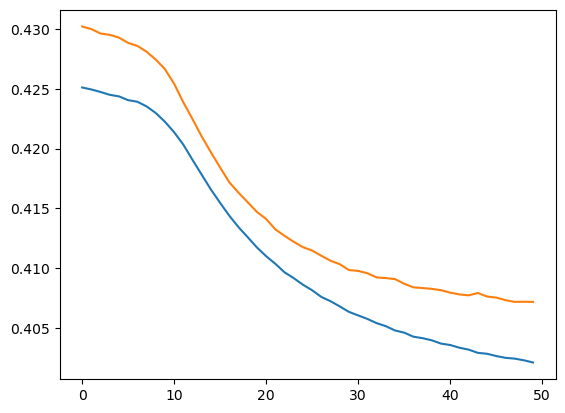

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

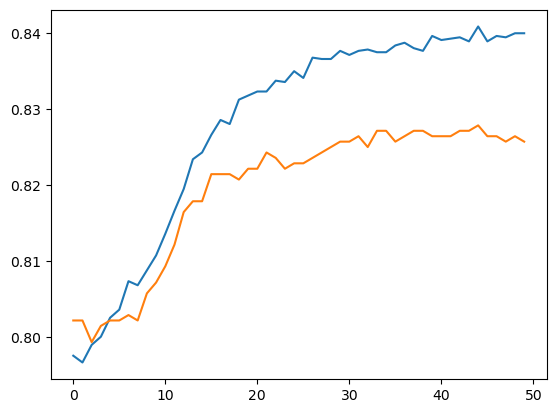

In [45]:
plt.plot(history.history['Accuracy'])

plt.plot(history.history['val_Accuracy'])

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [48]:
cm = confusion_matrix(y_test,y_pred)

In [49]:
cm

array([[2294,   79],
       [ 426,  201]], dtype=int64)

In [50]:
accuracy = accuracy_score(y_test,y_pred)

In [51]:
accuracy

0.8316666666666667

Text(95.72222222222221, 0.5, 'Truth')

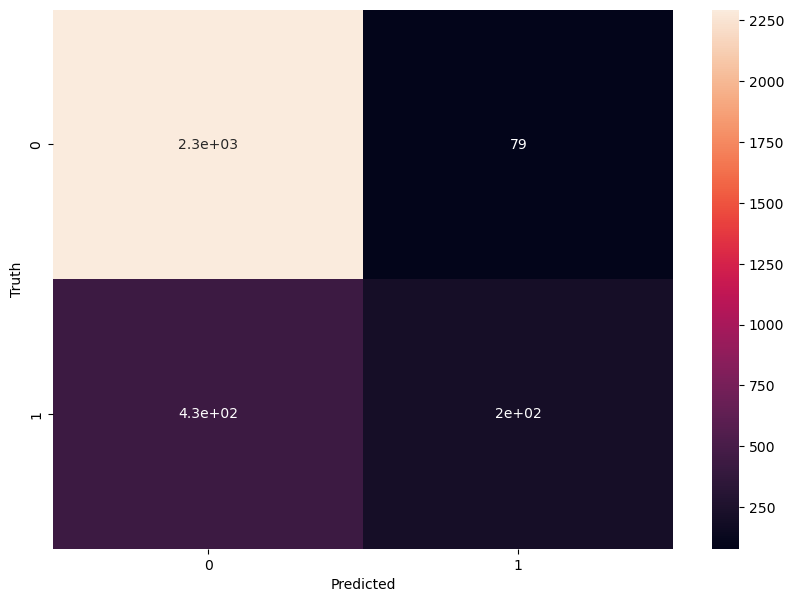

In [52]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
print(classification_report(y_test,y_pred))

#Precision of the model is 83 %. It looks good on paper but we should easily be able to get 100% with a more complex model.

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2373
           1       0.72      0.32      0.44       627

    accuracy                           0.83      3000
   macro avg       0.78      0.64      0.67      3000
weighted avg       0.82      0.83      0.81      3000

